In [4]:
#Load and Inspect the Data

import pandas as pd
# Load your dataset
df = pd.read_csv('/content/restaurant_data_big.csv')  # Replace with your actual file name

# Quick look
print(df.head())
print(df.info())
print(df.describe())


  Restaurant Name     Location  Cost for two Has Online Delivery  \
0    Restaurant_1       Suburb          1179                  No   
1    Restaurant_2     Downtown           230                  No   
2    Restaurant_3     Downtown           859                 Yes   
3    Restaurant_4  City Center           536                  No   
4    Restaurant_5         Mall          1194                 Yes   

  Has Table Booking  Aggregate rating  Votes      Cuisines  
0               Yes               4.9    760       Chinese  
1                No               4.9    358       Italian  
2                No               4.2    972  North Indian  
3               Yes               4.1    591     Fast Food  
4               Yes               4.1    174  South Indian  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant Name  

In [5]:
#Handle Missing Values

# Example: Fill numerical missing values with mean, categorical with mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


Restaurant Name        0
Location               0
Cost for two           0
Has Online Delivery    0
Has Table Booking      0
Aggregate rating       0
Votes                  0
Cuisines               0
dtype: int64


In [6]:
#Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Restaurant Name  Location  Cost for two  Has Online Delivery  \
0                0         3          1179                    0   
1               12         1           230                    0   
2               23         1           859                    1   
3               34         0           536                    0   
4               45         2          1194                    1   

   Has Table Booking  Aggregate rating  Votes  Cuisines  
0                  1               4.9    760         0  
1                  0               4.9    358         2  
2                  0               4.2    972         3  
3                  1               4.1    591         1  
4                  1               4.1    174         4  


In [7]:
# Split Data into Train and Test

from sklearn.model_selection import train_test_split

# Assume 'Aggregate rating' is the target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
#Train a Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [9]:
#Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Decision Tree Evaluation
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Linear Regression:
MSE: 0.5545558118218372
R2 Score: -0.24096405442648883

Decision Tree Regression:
MSE: 1.4485000000000003
R2 Score: -2.2413986013986014


In [10]:
#Interpret Influential Features

import numpy as np

coef = pd.Series(lr.coef_, index=X.columns)
print("Linear Regression Coefficients:")
print(coef.sort_values(ascending=False))


Linear Regression Coefficients:
Has Table Booking      0.130276
Cuisines               0.048315
Votes                  0.000808
Cost for two          -0.000383
Restaurant Name       -0.002317
Location              -0.109241
Has Online Delivery   -0.114826
dtype: float64


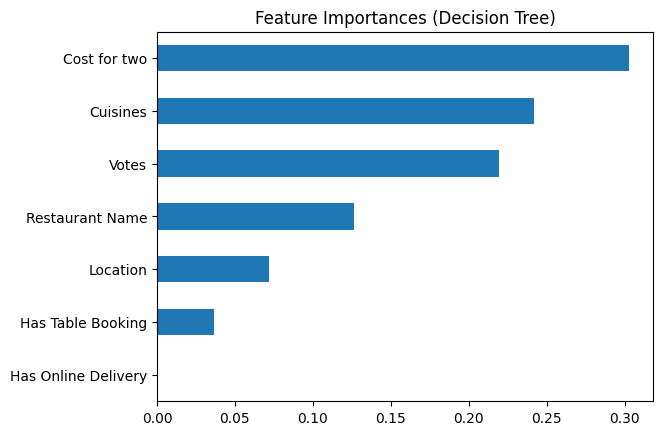

In [11]:
import matplotlib.pyplot as plt

importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances (Decision Tree)")
plt.show()
